In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.linear_model as skll
import category_encoders as catec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [229]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


In [230]:
df=pd.read_csv("dataframe_exercicio_modulo_9.csv")


dict_={"no":0,"yes":1}
lista=["schoolsup","famsup","paid","activities","internet","romantic"]
for i in lista:
    df[i]=df[i].map(dict_)
df.sex=df.sex.map({"F":0,"M":1})
df.Pstatus=df.Pstatus.map({"T":0,"A":1})    
df.famsize=df.famsize.map({"LE3":0,"GT3":1})    

Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [231]:
df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

#### Não foi constado dados faltantes.

In [232]:
df.corr()[["G3"]]

,G3
sex,-0.031472
age,-0.125282
famsize,-0.061209
Pstatus,0.030693
traveltime,-0.102627
studytime,0.161629
schoolsup,-0.079346
famsup,0.013313
paid,-0.049388
activities,0.033998


In [234]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,0,18,1,1,2,2,1,0,0,0,0,0,4,3,4,6,6
1,0,17,1,0,1,2,0,1,0,0,1,0,5,3,3,4,6
2,0,15,0,0,1,2,1,0,1,0,1,0,4,3,2,10,10
3,0,15,1,0,1,3,0,1,1,1,1,1,3,2,2,2,15
4,0,16,1,0,1,2,0,1,1,0,0,0,4,3,2,4,10


In [235]:
sc = StandardScaler()

In [236]:
    variaveis_para_normalizar = ["sex",
                                 "age",
                                 "famsize",
                                 "Pstatus",
                                 "traveltime",
                                 "studytime",
                                 "schoolsup",
                                 "famsup",
                                 "paid",
                                 "activities",
                                 "internet",
                                 "romantic",
                                 "famrel",
                                 "freetime",
                                 "goout",
                                 "absences",
                                 "G3"
                                 ]

In [237]:
sc.fit(df[variaveis_para_normalizar])

StandardScaler()

In [238]:
sc.transform(df[variaveis_para_normalizar])

array([[-0.87549841,  1.02788947,  0.64392092, ...,  0.73251148,
         0.2521546 , -1.38287106],
       [-0.87549841,  0.22103488,  0.64392092, ..., -0.1355271 ,
        -0.07006009, -1.38287106],
       [-0.87549841, -1.3926743 , -1.55298574, ..., -1.00356568,
         0.89658397, -0.34739149],
       ...,
       [-0.87549841,  1.02788947,  0.64392092, ..., -1.87160426,
         0.2521546 , -0.60626138],
       [ 1.14220653,  0.22103488, -1.55298574, ...,  1.60055006,
         0.2521546 , -0.34739149],
       [ 1.14220653,  1.02788947, -1.55298574, ..., -1.87160426,
        -0.07006009, -0.0885216 ]])

In [239]:
df_treino,df_teste=train_test_split(df_ord,test_size=0.25,random_state=0)

In [240]:
df_treino.shape,df_teste.shape

((783, 17), (261, 17))

In [241]:
x=df_treino.drop('G3', axis = 1)
y=df_treino.G3

In [242]:
x.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences
158,1,16,1,2,3,1,0,0,0,0,0,0,4,2,2,2
40,0,16,2,2,2,2,0,1,0,1,1,1,3,3,3,25
942,1,16,2,2,1,1,0,0,0,0,1,0,4,1,2,0
804,1,18,2,1,1,2,0,0,0,1,1,1,4,3,5,9
658,1,18,1,2,1,2,0,0,0,0,1,0,5,5,4,16


In [249]:
def val_cruzada_r2(modelo,nome_modelo,x,y,num_folds):
    cvs=cross_val_score(estimator=modelo,
                       X=x,
                       y=y,
                       cv=num_folds,
                       scoring="r2")
    modelo.fit(x,y)
    r2_treino=r2_score(y,modelo.predict(x))
    plt.figure(figsize=[10,5])
    plt.scatter(range(1,1+num_folds),cvs,c="red",s=100)
    plt.plot(range(1,1+num_folds),cvs,c="red",lw=2,label="R2 Cruzado")
    plt.plot(range(1,1+num_folds),[r2_treino]*num_folds,c="blue",lw=2,label="R2 Treino")
    plt.xticks(range(1,1+num_folds))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.legend(fontsize=8)
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_treino,2)) +" / "+ str(np.round(cvs.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

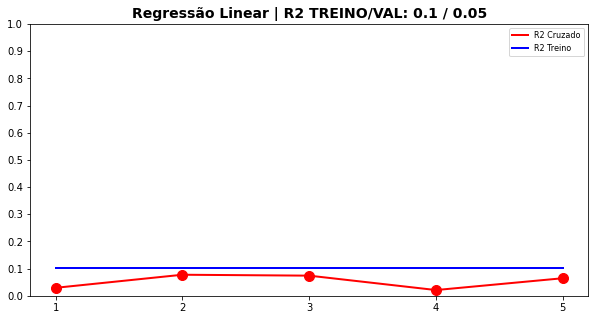

In [250]:
val_cruzada_r2(LinearRegression(),"Regressão Linear",x,y,5)

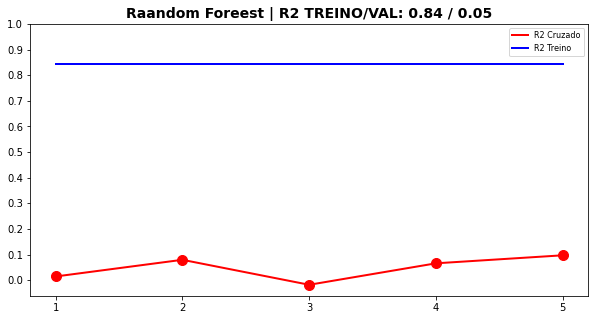

In [251]:
val_cruzada_r2(RandomForestRegressor(n_jobs=6, n_estimators=59, random_state=22),
               "Raandom Foreest",x,y,5)


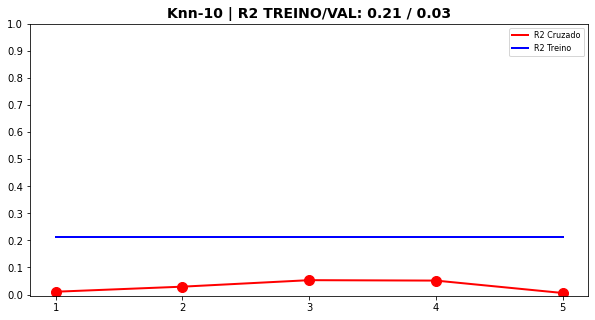

In [255]:
val_cruzada_r2(KNeighborsRegressor(n_neighbors=10),
               "Knn-10",
               x,
               y,5)

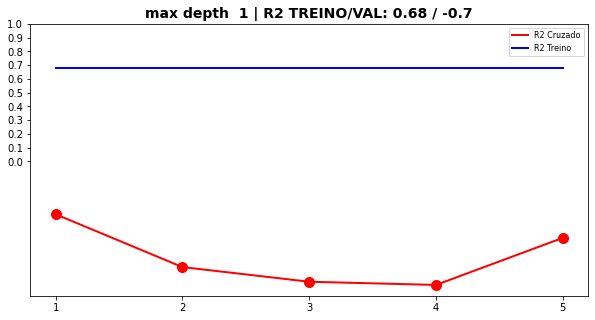

In [254]:
val_cruzada_r2(DecisionTreeRegressor(max_depth=10),
              "max depth  1",
              x,
              y,
              5)

### Após a análise dos algoritmos, percebe-se que a regressão linear é a que menos sofre overfittint,portanto será o modelo escolhido pra validação dos nossos dados.

In [257]:
lr=skll.LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)
y_pred
lin_reg = LinearRegression()
lin_reg.fit(x, y)
r2_score(y_true=y, y_pred=lin_reg.predict(x))

0.10253004022064438

In [263]:
x2=df_teste.drop('G3', axis = 1)
y2=df_teste.G3

In [265]:
y_pred2=lr.predict(x2)

In [266]:
r2_teste=r2_score(y2,y_pred2)

In [267]:
print(r2_teste)

0.06415647116429535


### Dentro dos valores observados, vimos que a regressão linear previu bem os dados, não sofrendo overfitting.